<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/AA_GRUPO3/blob/main/AA_PRACTICA3_GRUPO3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 3. Algoritmo genético

## Instalación de paquetes

In [1]:
!pip install deap
!pip install matplotlib
!pip install scoop
!pip install numpy
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importación de librerías

In [2]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

##Resolución del problema

**Enunciado**

Encontrar los máximos de la función "picos":

$$z = f(x,y) = 3(1-x)^2e^{-(x^2)-(y+1)^2}-10(x/5-x^3-y^5)e^{-x^2-y^2}-1/3e^{-(x+1)^2-y^2}$$

En el dominio $$\{x,y\} \in [-100,100]$$

####Espacio de búsqueda o domino de la solución. Gráfica de la función objetivo 

Text(0.5, 0, 'f(x,y)')

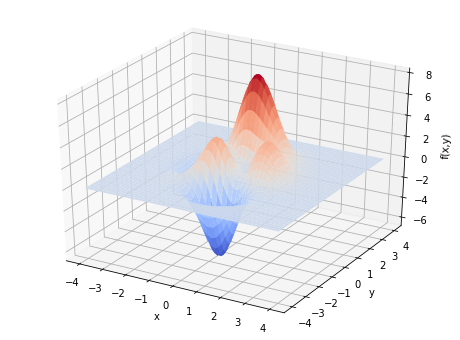

In [3]:
# Definimos la función objetivo
def funcion_prueba(x):
    # x es x[0] e y es x[1]
    res = 3*(1-x[0])**2 * np.exp(-(x[0]**2)-(x[1]+1)**2) - 10*(x[0]/5 - x[0]**3 - x[1]**5) * np.exp(-x[0]**2-x[1]**2) - 1/3*np.exp(-(x[0]+1)**2-x[1]**2)
    return res

# Generamos vectores que barran todo el dominio
x = np.linspace(-4, 4, 1000)
y = np.linspace(-4, 4, 1000)

# Evaluamos todos los valores de las variables
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([funcion_prueba(val) for val in vals],(1000, 1000))

# Representamos los resultados obtenidos
figure_3d = plt.figure(figsize=(8,6))
ax = figure_3d.gca(projection="3d")
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

Tras buscar el par "x, y" (x[0] y x[1]) de la función, encontramos que el máximo está entre 8.0926 y 8.0980, donde x e y se encuentran alrededor de x = -0.0303 e y = 1.6061.

Esto lo hacemos para poder observar como de cerca se quedan cada uno de los "Experimentos" al máximo real de la función picos y poder así compararlos.

#### 0. Hiperparámetros

En esta sección se definen los hiperparámetros del modelo que se modificarán en busca de la mejor solución

In [4]:
N_POBLACION = 32 # Tamaño población
CXPB = 0.5 # Probabilidad de Cruce
MUTPB = 0.2 # Probabilidad de Mutación
NGEN = 20 # Número de Generaciones
UNIFORM_INDPB = 0.5 # Probabilidad de cruce Uniforme

#### 1. Definición de los objetos de la librería Deap

In [5]:
import random
from deap import base
from deap import creator
from deap import tools

Definimos las clases `FitnessMax` e `Individual`

In [6]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

In [7]:
creator.create("Individual", list, fitness=creator.FitnessMax)

Creamos los 3 experimentos:
 - Cruce en un punto
 - Cruce en dos puntos
 - Cruce uniforme

In [8]:
toolbox1 = base.Toolbox()
toolbox2 = base.Toolbox()
toolbox3 = base.Toolbox()

EXPERIMENTOS = [toolbox1, toolbox2, toolbox3]

In [9]:
for toolbox in EXPERIMENTOS:
  # Generación de genes
  toolbox.register("attr_uniform", random.uniform, -100, 100)
  # Generación de inviduos
  toolbox.register("individual", tools.initRepeat, creator.Individual,
                   toolbox.attr_uniform, 2)
  # Generación de población
  toolbox.register("population", tools.initRepeat, list,
                   toolbox.individual, N_POBLACION)

Comenzamos añadiendo a la toolbox los genes de manera aleatoria; a continuación, los individuos juntando pares de genes y por último, la población, tomando 32 individuos.

Comprobamos que las funciones funcionan correctamente

In [10]:
# Ejemplo de la generación de un individuo aleatorio
individuo = toolbox1.individual()
print(individuo)

# Ejemplo de creación de una población. Se ve que es una lista de 32 listas (una por cada individuo)
poblacion = toolbox1.population()
print(poblacion)
print(len(poblacion))

# Vacío, porque aun no ha sido evaluado
individuo.fitness.values

[22.049923437862873, 54.01154303528412]
[[-10.516671986165946, -12.328804852797887], [-1.437428200477882, -39.85989947049555], [-81.94032672614941, -74.77060390425004], [-50.64397108012344, 45.11146439810608], [38.91113712171685, -88.27604817976055], [18.223781264000394, -46.7087409251663], [6.084336491272737, -84.4443862166363], [-55.030920316822396, 8.365304029411021], [69.29750062919842, 44.61016227728308], [75.45664531956473, -35.43758724674623], [-46.10167364860131, -25.90279608935009], [6.676449436385923, 75.75824645281295], [-0.6939082604845481, -90.07592696137516], [-87.6060751376349, 31.55557486078277], [-18.87566966791232, -8.195292986600606], [-67.12026246768642, 64.7193419222125], [-84.79901011440776, -40.081812715061126], [66.88587357770444, -49.798578421778906], [39.68034239011223, -21.052860262935624], [6.268715910957383, -54.01032507322383], [-47.62446936795899, -93.82674453365199], [4.320463328120994, 81.0907206000609], [39.38025798676847, -74.80557489519907], [-69.249

()

#### 2. Función objetivo y operadores genéticos

In [11]:
def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(x)):
        if x[i] > 100 or x[i] < -100:
            return -1,
    res = 3*(1-x[0])**2 * np.exp(-(x[0]**2)-(x[1]+1)**2) - 10*(x[0]/5 - x[0]**3 - x[1]**5) * np.exp(-x[0]**2-x[1]**2) - 1/3*np.exp(-(x[0]+1)**2-x[1]**2)
    return res,

In [12]:
for toolbox in EXPERIMENTOS:
  toolbox.register("evaluate", funcion_objetivo)

#### 3. Incorporar los operadores genéticos

CRUCE

In [13]:
# Registro de operacion genética de cruce
toolbox1.register("mate", tools.cxOnePoint)
toolbox2.register("mate", tools.cxTwoPoint)
toolbox3.register("mate", tools.cxUniform, indpb = UNIFORM_INDPB)

MUTACIÓN

In [14]:
for toolbox in EXPERIMENTOS:
  toolbox.register("mutate", tools.mutGaussian, mu=0,
                   sigma= 5, indpb=0.1)

SELECCIÓN

In [15]:
for toolbox in EXPERIMENTOS:
  toolbox.register("select", tools.selTournament, tournsize=3)

#### 4. Últimos pasos: Algoritmo genético como una caja negra

Es necesario definir una semilla a la hora de generar los números aleatorios, de esta forma, se toman números aleatorios pero que si volvemos a ejecutar el código, serán los mismos (parcialmente aleatorio).

In [16]:
random.seed(42)

In [17]:
#Generamos la Población Inicial
pop1 = toolbox1.population()
pop2 = toolbox2.population()
pop3 = toolbox3.population()
INITIAL_POP = [pop1, pop2, pop3]

In [18]:
# Definimos el objeto hof que almacenará el mejor individuo de cada experimento
# encontrado a lo largo de las generaciones.
hof1 = tools.HallOfFame(1)
hof2 = tools.HallOfFame(1)
hof3 = tools.HallOfFame(1)
HOF = [hof1, hof2, hof3]

In [19]:
# Definimos un objeto para guardar las estadísticas de la 
# población a lo largo de las generaciones.
stats1 = tools.Statistics(lambda ind: ind.fitness.values)
stats2 = tools.Statistics(lambda ind: ind.fitness.values)
stats3 = tools.Statistics(lambda ind: ind.fitness.values)
STATS = [stats1, stats2, stats3]

In [20]:
# En dicho objeto, guardaremos: la media, la desviación típica, el mínimo 
# y el máximo por genereación.
for stats in STATS:
  stats.register("avg", np.mean)
  stats.register("std", np.std)
  stats.register("min", np.min)
  stats.register("max", np.max)

In [21]:
# loogbook contendrá todo el registro de evolución
logbook1 = tools.Logbook()
logbook2 = tools.Logbook()
logbook3 = tools.Logbook()
LOGBOOKS = [logbook1, logbook2, logbook3]

#### 5. Lanzamos los experimentos

In [22]:
# Empaquetamos los experimentos en una lista para lanzarlos cómodamente a través de un bucle for
E = list(zip(EXPERIMENTOS, INITIAL_POP, HOF, STATS, LOGBOOKS))

In [23]:
i = 0
for exp, pop, hof, stats, logbook in E:
  i += 1
  print(f'\nEXPERIMENTO {i}:\n')
  pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)


EXPERIMENTO 1:

gen	nevals	avg          	std	min          	max
0  	32    	-2.16768e-285	0  	-6.93659e-284	0  
1  	19    	0            	0  	0            	0  
2  	17    	0            	0  	0            	0  
3  	21    	5.02362e-122 	2.79703e-121	0            	1.60756e-120
4  	18    	1.00472e-121 	3.89128e-121	0            	1.60756e-120
5  	18    	2.39659e-54  	1.33437e-53 	-2.11661e-232	7.66909e-53 
6  	26    	5.98937e-22  	3.33474e-21 	0            	1.9166e-20  
7  	24    	1.19787e-21  	4.63935e-21 	0            	1.9166e-20  
8  	15    	2.99469e-21  	6.95902e-21 	0            	1.9166e-20  
9  	17    	8.38512e-21  	9.50784e-21 	3.29447e-153 	1.9166e-20  
10 	22    	1.6752e-20   	1.13476e-20 	0            	5.52394e-20 
11 	19    	2.6984e-20   	1.3945e-20  	1.07487e-25  	5.52394e-20 
12 	17    	3.27612e-20  	1.4561e-20  	8.51459e-21  	5.52394e-20 
13 	16    	4.51936e-20  	1.10717e-20 	1.9166e-20   	5.52394e-20 
14 	21    	4.94157e-20  	1.38597e-20 	2.81985e-25  	5.52394e-20 
15 	21    	5.30

##Conclusiones
Tras lanzar los experimentos, vemos que en solo 20 generaciones y con una población de 32 individuos, los resultados son poco favorables.

El Experimento 3, haciendo uso de un cruce "Uniforme" devuelve un máximo lógico en comparación con los dos primeros desde la generación 18. Sin embargo, los experimientos 1 y 2 que hacen uso del cruce "punto de cruce" (de uno y dos puntos respectivamente) finalizan la veinteaba generación sin aproximarse al máximo real.

¿Quiere decir esto que el cruce uniforme es el mejor?

Probemos modificando los hiperparámetros y veamos qué sucede.

###Variaciones
Cambiamos los valores de los hiperparámetros. En concreto el tamaño de la población y el número de generaciones.

In [55]:
N_POBLACION = 150 # Tamaño población
NGEN = 55 # Número de Generaciones

In [54]:
p_toolbox1 = base.Toolbox()
p_toolbox2 = base.Toolbox()
p_toolbox3 = base.Toolbox()

PRUEBA = [p_toolbox1, p_toolbox2, p_toolbox3]

In [56]:
for toolbox in PRUEBA:
  # Generación de genes
  toolbox.register("attr_uniform", random.uniform, -100, 100)
  # Generación de inviduos
  toolbox.register("individual", tools.initRepeat, creator.Individual,
                   toolbox.attr_uniform, 2)
  # Generación de población
  toolbox.register("population", tools.initRepeat, list,
                   toolbox.individual, N_POBLACION)

In [57]:
for toolbox in PRUEBA:
  toolbox.register("evaluate", funcion_objetivo)

In [58]:
# CRUCE
p_toolbox1.register("mate", tools.cxOnePoint)
p_toolbox2.register("mate", tools.cxTwoPoint)
p_toolbox3.register("mate", tools.cxUniform, indpb = UNIFORM_INDPB)

In [59]:
for toolbox in PRUEBA:
  # MUTACIÓN
  toolbox.register("mutate", tools.mutGaussian, mu=0,
                   sigma= 5, indpb=0.1)
  # SELECCIÓN
  toolbox.register("select", tools.selTournament, tournsize=3)

In [60]:
random.seed(42)

# Generamos la Población Inicial
p_pop1 = p_toolbox1.population()
p_pop2 = p_toolbox2.population()
p_pop3 = p_toolbox3.population()
INITIAL_POP = [p_pop1, p_pop2, p_pop3]

# Hof
p_hof1 = tools.HallOfFame(1)
p_hof2 = tools.HallOfFame(1)
p_hof3 = tools.HallOfFame(1)
HOF = [p_hof1, p_hof2, p_hof3]

# Stats
p_stats1 = tools.Statistics(lambda ind: ind.fitness.values)
p_stats2 = tools.Statistics(lambda ind: ind.fitness.values)
p_stats3 = tools.Statistics(lambda ind: ind.fitness.values)
STATS = [p_stats1, p_stats2, p_stats3]

In [61]:
for stats in STATS:
  stats.register("avg", np.mean)
  stats.register("std", np.std)
  stats.register("min", np.min)
  stats.register("max", np.max)

p_logbook1 = tools.Logbook()
p_logbook2 = tools.Logbook()
p_logbook3 = tools.Logbook()
LOGBOOKS = [p_logbook1, p_logbook2, p_logbook3]

In [62]:
E = list(zip(EXPERIMENTOS, INITIAL_POP, HOF, STATS, LOGBOOKS))

In [63]:
i = 0
for exp, pop, hof, stats, logbook in E:
  i += 1
  print(f'\n PRUEBA EXPERIMENTO {i}:\n')
  pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)


 PRUEBA EXPERIMENTO 1:

gen	nevals	avg        	std        	min         	max        
0  	150   	1.29228e-50	1.57743e-49	-8.19747e-63	1.93843e-48
1  	83    	3.87685e-50	2.7138e-49 	0           	1.93843e-48
2  	84    	2.76485e-42	3.37493e-41	0           	4.14727e-40
3  	94    	1.10594e-41	6.68156e-41	-3.93173e-72	4.14727e-40
4  	94    	4.01444e-40	4.6971e-39 	-3.93173e-72	5.77282e-38
5  	96    	1.58684e-39	9.29351e-39	-3.93173e-72	5.77282e-38
6  	81    	4.99154e-39	1.58707e-38	-3.93173e-72	5.77282e-38
7  	105   	3.73742e-05	0.000467971	-0.000141737	0.00574795 
8  	91    	2.5623e-18 	3.12769e-17	1.78798e-66 	3.84345e-16
9  	89    	7.70529e-18	5.38061e-17	-9.19233e-73	3.84345e-16
10 	89    	1.79361e-17	8.10675e-17	-5.85636e-68	3.84345e-16
11 	94    	0.0063887  	0.077984   	2.01964e-87 	0.958305   
12 	89    	0.0127774  	0.109915   	2.43387e-52 	0.958305   
13 	89    	0.0447209  	0.202129   	5.77282e-38 	0.958305   
14 	96    	0.122449   	0.334224   	-0.798724   	0.958305   
15 	81    	0.35

Observamos ahora, que el mejor Experimento (con 55 generaciones y una población bastante mayor de 150 individuos) sería el primero, con un punto de cruce.

El segundo sigue sin alcanzar el máximo pero ya devuelve una cifra superior al 8. Y el tercero, sigue siendo notablemente bueno.

También, entendemos que convergería de otra manera si la semilla elegida fuese otra distinta, ya que los números aleatorios serían otros. Entendemos que dos puntos de cruce debería dar un resultado más favorable que uno solo, ya que implementa una mayor diversidad y es más probable converger al máximo antes; pero como hemos dicho, esto tiene que ver con la aleatoriedad.

Otra de las pruebas que realizamos fue cambiar la semilla de 42 a 100 y los resultados fueron como esperábamos:


1.   Experimento 1 alcanzó el 3.54118 como máximo
2.   Experimento 2 alcanzó el 7.97463 como máximo
3.   Experimento 3 alcanzó el 8.09737 como máximo

Como se puede ver, el segundo es mucho mejor que el primero si cambiamos la semilla.


###Otras conclusiones
Finalmente, podemos concluir que no hay gran diferencia entre un cruce u otro, el mayor peso lo tiene la aleatoriedad, pues depende de los números random que se generen los resultados van a ser increiblemente dispares.

Si bien, seguimos apoyando que dos cruces devuelven mejores resultados que uno solo en la mayoría de los casos, debido a lo que citamos previamente, que habrá mayor diversidad de individuos.

Tras realizar este ejercicio entendemos claramente el nombre que se le ha dado a este algoritmo, pues al fin y al cabo, la genética depende con un porcentaje muy alto de la aleatoriedad.